# **Author:** Pranav Yadav
   - LinkedIn: [yadavpranav](https://www.linkedin.com/in/yadavpranav/)
   - GitHub: [pranav-yadav](https://github.com/pranav-yadav)

# **Data Science & Business Analytics Tasks**
## **Task #1:** Prediction using Supervised ML
Submitted in fulfillment of #GRIP21 SEP

* Task: Predicting the percentage score of a student based on number of study hours

* Dataset: [Student Scores CSV](https://bit.ly/w-data)

* ML Algo type: Linear Regression with Python Scikit Learn (Supervised ML)

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading (Importing) data from remote link
dataset_url = "https://bit.ly/w-data"
data = pd.read_csv(dataset_url)

print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Graphical Analysis of data by plotting the dataset on 2D graph using Matplotlib

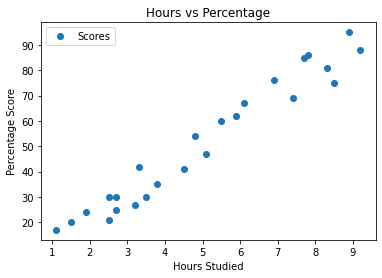

In [3]:
# Plotting the distribution of scores
data.plot(x = "Hours", y = "Scores", style = "o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

From the above graph, we can confer that there is direct **Positive Linear Relation** between the number of hours the student studied and the percentage score.

### Preprocessing the data
Let's divide the data into Inputs (`Attributes`) and Outputs (`Labels`)

In [4]:
X = data.iloc[:, : -1].values
y = data.iloc[:, 1].values

* Splitting of Data: Let's split the data inti 
training and testing sets; using Scikit-Learn's built-in `train_test_split()` method

In [6]:
# Importing from Scikit-Learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    train_size = 0.8,
                                                    random_state = 0)

print("Splitting Completed")

Splitting Completed


### Training the model
After splitting the data into training and testing sets, let's define and train our model.
As, there is Linear Realation as seen after plotting the original data we can use `LinearRegression` algorithm from Scikit-Learn
 

In [7]:
# Importing from Scikit-Learn
from sklearn.linear_model import LinearRegression
# define the regressor
reg_model = LinearRegression() 
# fitting the data to the model
reg_model.fit(X_train, y_train)

print("Training Completed")

Training Completed


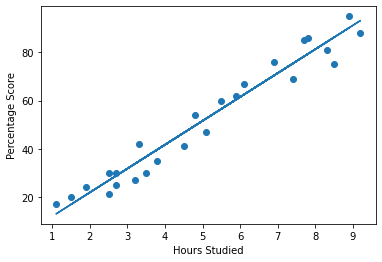

In [8]:
# defining the Regression Line
reg_line = reg_model.coef_ * X + reg_model.intercept_

# Plotting the Regression Line on original data
plt.scatter(X, y)
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.plot(X, reg_line)
plt.show()

### Predictions
* Predictions on test data: After training (fitting) the model using `X_train, y_train` let's test our model using test data i.e., `X_test`

In [9]:
# testing data in hrs
print("Testing Data:\n", X_test)

# predicting the scores for test data
y_preds = reg_model.predict(X_test)

Testing Data:
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Compairing the Actual vs Predicted; test data
df = pd.DataFrame({"Actual": y_test, "Predicted": y_preds})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


* Predictions on unknown data: Let's predict the percentage score of a student who studied for `9.25hrs / day` using our model i.e.,

 - Given: Hours Studied = `9.25hrs / day`
 - To predict: Percentage Score / 100



In [15]:
# predicting score for unknown data
hrs = 9.25

unk_pred = reg_model.predict([[hrs]])
print("No. of Hours Studied = ", hrs, "hrs/day")
print("Prdicted Percentage Score = ", unk_pred[0])

No. of Hours Studied =  9.25 hrs/day
Prdicted Percentage Score =  93.69173248737539


Hence, student who studied for `9.25 hrs/day` should get the score `93.69173248737539 %` 

### Model Evaluation
Let's evaluate the performance of our model (algo) using MAE (Mean Absolute Error), with `y_test, y_preds`

In [16]:
# Import from Scikit-Learn
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:", mean_absolute_error(y_test, y_preds))

Mean Absolute Error: 4.183859899002982
